The weighted KNN algorithm is a variant of the classical KNN algorithm, which assigns different weights to the nearest neighbors of a test point. These weights are calculated based on the distance between the test point and its neighbors.

In this work, the weighted KNN algorithm will be applied to the Iris and Sonar problems. For each problem, different values ​​will be evaluated for the parameters K and h, which control the number of neighbors and the openness of the kernel, respectively.

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, pairwise_distances

The following code implements the normal and weighted KNN algorithm:


In [ ]:
# Função KNN
def ourKNN(xt, xin, yin, k):
    xrep = np.tile(xt, (len(xin), 1))
    dmat1 = np.sum((xrep - xin) ** 2, axis=1)
    seqNN = np.argsort(dmat1)
    yhat = np.sign(np.sum(yin[seqNN[:k]]))
    return yhat

#KNN ponderado
def ourKNNponderado(xt, xin, yin, k, h):
    dmat1 = np.sum((xt - xin)**2, axis=1)
    seqNN = np.argsort(dmat1)[:k]
    xx = np.exp(-dmat1[seqNN] / h**2)
    yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))

    if np.isnan(yhat):
        yhat = 0

    return int(round(yhat))

The exercise is divided into two main parts:


* The first part calculates the distance between the test point xt and each training point xin.
* The second part assigns weights to the nearest neighbors based on the distance between them and the test point.

####The following code applies the weighted KNN algorithm to the Iris problem:


The Iris dataset is loaded and divided into training and testing sets.

In [ ]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()
X_iris = scaler.fit_transform(X_iris)

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.1, random_state=42)

The parameters K and h are varied, and for each combination of K and h the weighted algorithm is applied to the training set, the accuracy of the model is calculated in the tests for each h and stored in a vector, after which the variation in accuracy is plotted and the its average is stored in a vector to show the average accuracy of the same K for different h's


In [ ]:
k_values = [1, 2, 4, 8, 16, 32, 64]
h_values = [0.2, 0.4, 0.8, 1.6, 2, 2.5, 3, 3.5, 4, 8, 16]
accuracies_h = []
accuracies_k = []

accuracy_matrix = np.zeros((len(h_values), len(k_values)))

h_to_index = {}
for i, h in enumerate(h_values):
    h_to_index[h] = i

k_to_index = {}
for i, k in enumerate(k_values):
    k_to_index[k] = i

for k in k_values:
  for h in h_values:
      y_pred = [ourKNNponderado(xt, X_train_iris, y_train_iris, k, h) for xt in X_test_iris]
      accuracy = accuracy_score(y_test_iris, y_pred)
      i = h_to_index[h]
      j = k_to_index[k]
      accuracy_matrix[i, j] = accuracy
      accuracies_h.append(accuracy)
  accuracies_k.append(np.mean(accuracies_h))
  accuracies_h = []

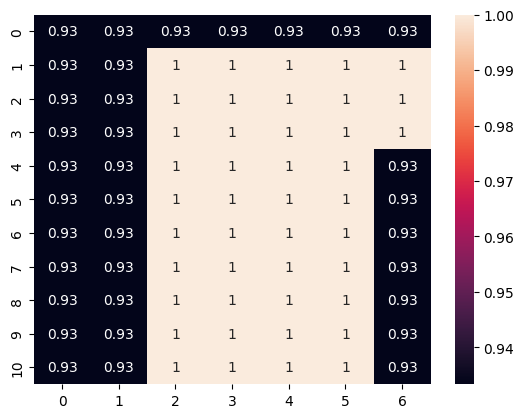

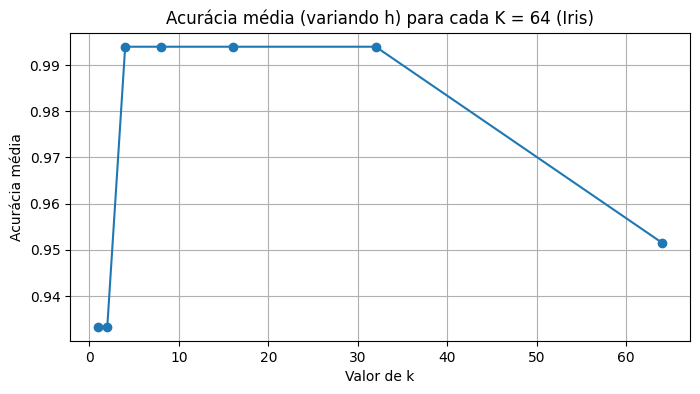

In [ ]:
#Caso Iris
sns.heatmap(accuracy_matrix, annot=True)

plt.show()


plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_k, marker='o')
plt.title(f'Acurácia média (variando h) para cada K = {k} (Iris)')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média')
plt.grid()
plt.show()

For the iris case, it is notable how easily the network had to solve the problem for values ​​of K > 2. As h increases, the accuracy tends to increase as well.


####The following code applies the weighted KNN algorithm to the Sonar problem:


The Iris dataset is loaded and divided into training and testing sets.


In [ ]:
sonar = fetch_openml(name="sonar", version=1)
X_sonar = sonar.data
y_sonar = sonar.target

mapping = {'Rock': 0, 'Mine': 1}
y_sonar = y_sonar.map(mapping)
y_sonar = y_sonar.to_numpy()

scaler = StandardScaler()
X_sonar = scaler.fit_transform(X_sonar)

X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(X_sonar, y_sonar, test_size=0.1, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The parameters K and h are varied, and for each combination of K and h the weighted algorithm is applied to the training set, the accuracy of the model is calculated in the tests for each h and stored in a vector, after which the variation in accuracy is plotted and the its average is stored in a vector to show the average accuracy of the same K for different h's


In [ ]:
k_values = [1, 2, 4, 8, 16, 32, 64]
h_values = [0.2, 0.4, 0.8, 1.6, 2, 2.5, 3, 3.5, 4, 8, 16]
accuracies_h = []
accuracies_k2 = []

accuracy_matrix2 = np.zeros((len(h_values), len(k_values)))

h_to_index = {}
for i, h in enumerate(h_values):
    h_to_index[h] = i

k_to_index = {}
for i, k in enumerate(k_values):
    k_to_index[k] = i

for k in k_values:
  for h in h_values:
      y_pred = [ourKNNponderado(xt, X_train_sonar, y_train_sonar, k, h) for xt in X_test_sonar]
      accuracy = accuracy_score(y_test_sonar, y_pred)
      i = h_to_index[h]
      j = k_to_index[k]
      accuracy_matrix2[i, j] = accuracy
      accuracies_h.append(accuracy)
  accuracies_k2.append(np.mean(accuracies_h))
  accuracies_h = []

<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))
<ipython-input-6-def89a2642cf>:14: RuntimeWarning: invalid value encountered in double_scalars
  yhat = (np.sum(yin[seqNN] * xx))/(np.sum(xx))

For the Sonar case, it is notable that the K=8 case had a higher average accuracy than the others and, for K=8, the best result was with h at higher values, in the case 3.5 and 4. In general, it is notable that for For very small K's the weighted KNN was unable to solve, however for very large K's the average accuracy also fell (as observed at K=16). The solution in this case tends to be better as the value of h increases.


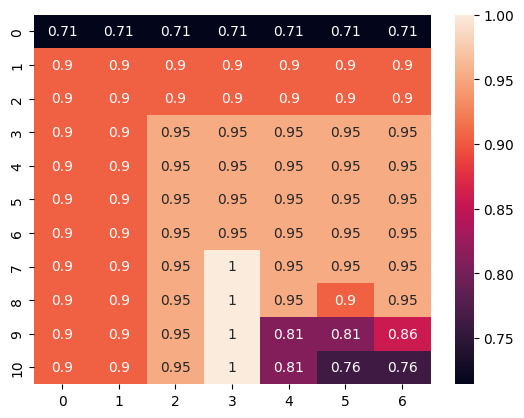

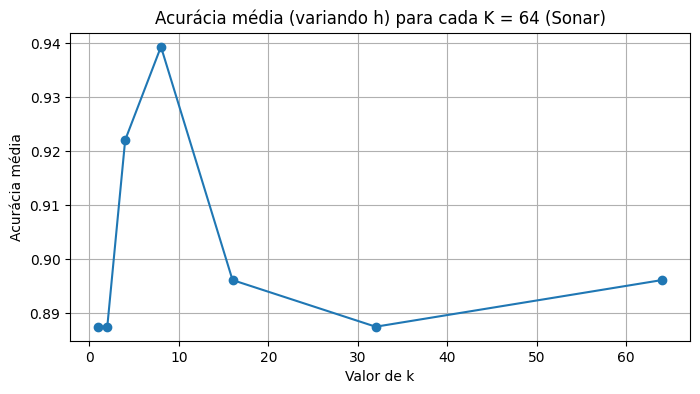

In [ ]:
#Caso Sonar
sns.heatmap(accuracy_matrix2, annot=True)

plt.show()


plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies_k2, marker='o')
plt.title(f'Acurácia média (variando h) para cada K = {k} (Sonar)')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia média')
plt.grid()
plt.show()